Task 1 - Iris Flowers Classification ML Project

Load Basic Libraries and Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [2]:
df=pd.read_csv('IRIS.csv')

Data Analysis

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
df.shape

(150, 5)

In [6]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [7]:
df.describe

<bound method NDFrame.describe of      sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]>

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


To find null values

In [9]:
df.isnull()

,sepal_length,sepal_width,petal_length,petal_width,species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [10]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [11]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [12]:
from matplotlib import pyplot

Data Visualization

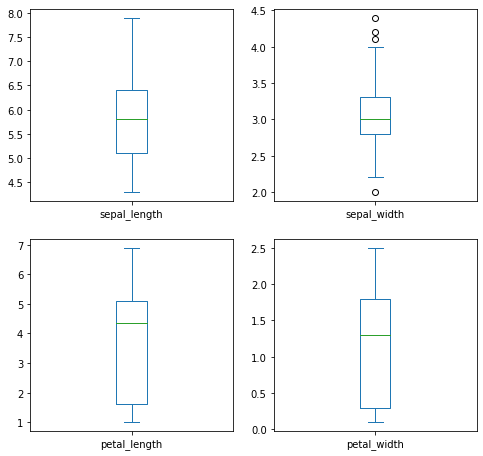

In [13]:
df.plot(kind='box', subplots=True, layout=(3,2), sharex=False, sharey=False, figsize=(8,12))
pyplot.show()

Pairplot

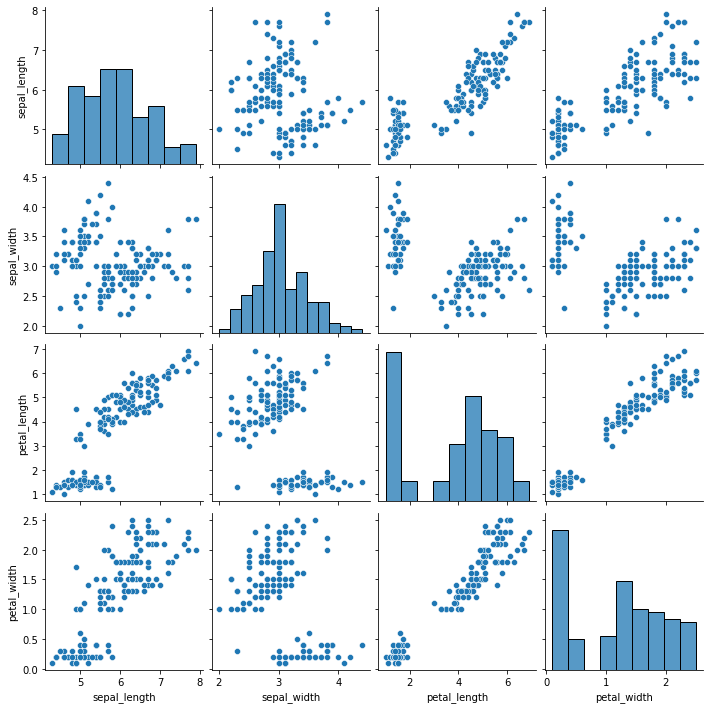

In [14]:
sns.pairplot(df)

Correlation Heatmap

<AxesSubplot:>

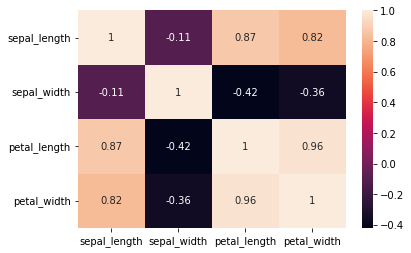

In [15]:
sns.heatmap(df.corr(),annot=True)

Distrubution Graph

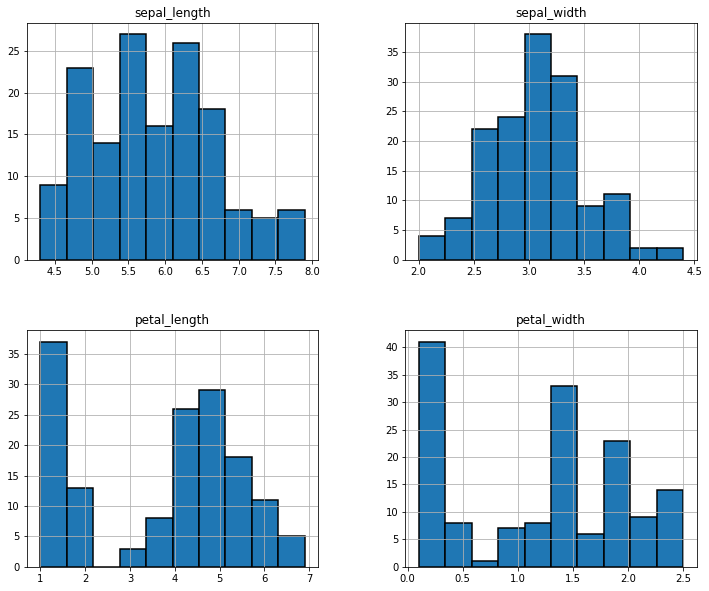

In [16]:
df.hist(edgecolor='black',linewidth=1.5)
fig=plt.gcf()
fig.set_size_inches(12,10)

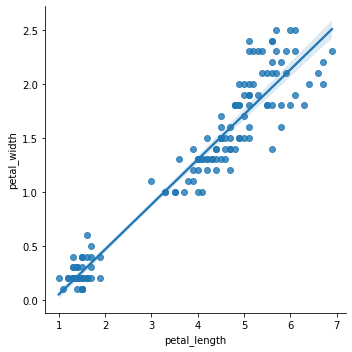

In [17]:
fig=sns.lmplot(x="petal_length",y="petal_width",data=df)


Scatter Plot

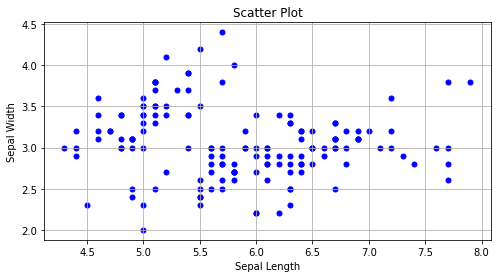

In [18]:
x=df["sepal_length"]
y=df["sepal_width"]
plt.figure(figsize=(8,4))
plt.title("Scatter Plot")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.scatter(x,y,marker='.',c='b',s=100)
plt.grid(True)
plt.show()

Violin Plot

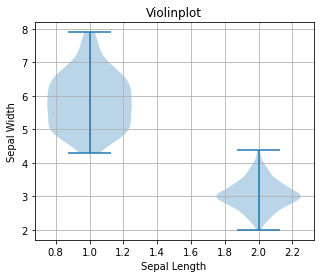

In [19]:
x=(df["sepal_length"])
a=(df["sepal_width"])
plt.figure(figsize=(5,4))
data=list([df["sepal_length"],df["sepal_width"]])
plt.title("Violinplot")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.violinplot(data)
plt.grid(True)
plt.show()

Pie Chart

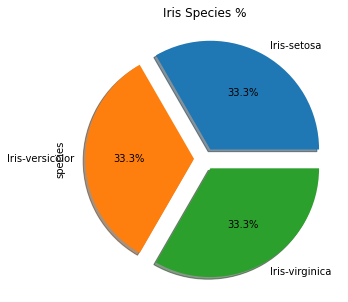

In [20]:
a=plt.subplots(1,1,figsize=(10,8))
df['species'].value_counts().plot.pie(explode=[0.1,0.1,0.1],autopct='%1.1f%%',shadow=True,figsize=(5,5))
plt.title("Iris Species %")
plt.show()

Splitting Of Dataset

In [21]:
X=df.iloc[:,:-1].values
y=df.iloc[:,4].values

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=42)

In [23]:
print(len(X_train))

90


In [24]:
print(len(X_test))

60


Evaluate the Algorithms

KNeighbors Classifier

In [25]:
model=KNeighborsClassifier()
model.fit(X_train,y_train)
predictions=model.predict(X_test)
print(100*accuracy_score(y_test,predictions),'%')

98.33333333333333 %


Random Forest Classifier

In [26]:
model=RandomForestClassifier(n_estimators=5)
model.fit(X_train,y_train)
predictions=model.predict(X_test)
print(100*accuracy_score(y_test,predictions),'%')

98.33333333333333 %


Support Vector Machine

In [27]:
model=SVC()
model.fit(X_train,y_train)
predictions=model.predict(X_test)
print(100*accuracy_score(y_test,predictions),'%')

100.0 %


Logistic Regression

In [28]:
model=LogisticRegression()
model.fit(X_train,y_train)
predictions=model.predict(X_test)
print(100*accuracy_score(y_test,predictions),'%')

100.0 %


Confusion Matrix

In [29]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test,predictions)
cnf_matrix

array([[23,  0,  0],
       [ 0, 19,  0],
       [ 0,  0, 18]], dtype=int64)

Confusision Matrix Visualization

Text(0.5, 257.44, 'Predicted Label')

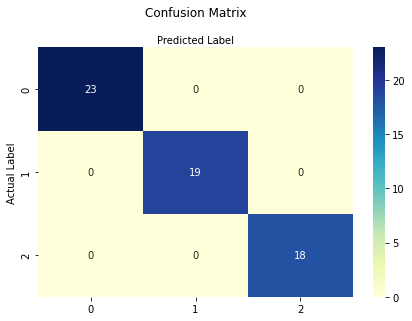

In [30]:
class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True,fmt='g', cmap="YlGnBu" )
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual Label') 
plt.xlabel('Predicted Label')